# Log Regression Classification

In [7]:
import brainlit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from brainlit.algorithms.regression import *

# Tutorial for running the log-regression classifiers on extracted features

Loading extracted neighborhood features from csv file(This file will be changed to include the whole data).<br />
The neighborhood here is a 4x4x4 with 64 features.

In [5]:
output_feats = "flat_neighbourhoods_3.csv" ##File will be changed to include larger dataset
df_iter = pd.read_csv(output_feats, header=None, index_col=0)
n_features = df_iter.shape[1] - 1
X_all = df_iter.iloc[:, :n_features]
y_all = df_iter.iloc[:, n_features:]

Normalizing and splitting the dataset

In [6]:
X_all = StandardScaler().fit_transform(X_all)
X_sel, X_test, y_sel, y_test = train_test_split(
    X_all, y_all, test_size=40, random_state=42)

Setting up classifiers to train:<br />
1) Multilayer Perceptron with 4 hiddenlayer, all layers having sigmoid activation.<br />
2) Simple Logistic Regression classifier<br />
3) Two layer Neural Network with output Logistic Regression layer with sigmoid activation and input layer is a fullyconnected layer with ReLU activation.<br />

In [9]:
classifiers = [
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", alpha=1, max_iter=1000),
    LogisticRegression(max_iter=2000),
    MLP_LR_NN(X_sel, y_sel, n_features),
]

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running the classifiers on the train and test data to get accuracy of each classifier.<br />
The accuracy, train time, test time, classifier name and number of iteration is stored in a csv file : "test.csv"

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  3.69it/s]

40/40 [==============================] - 0s 449us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.62it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.20it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 623us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.82it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 648us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.04it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.01it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 599us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.19it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████  

40/40 [==============================] - 0s 1ms/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [00:01<00:01,  1.89s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 474us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.74it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 474us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.04s/it]

 50%|██████████████████████████████████████████                                          | 1/2 [00:06<00:06,  6.13s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                              

40/40 [==============================] - 0s 398us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.91s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.85s/it]
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\brainlit\algorithms\regression\log_regression.py:209: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling

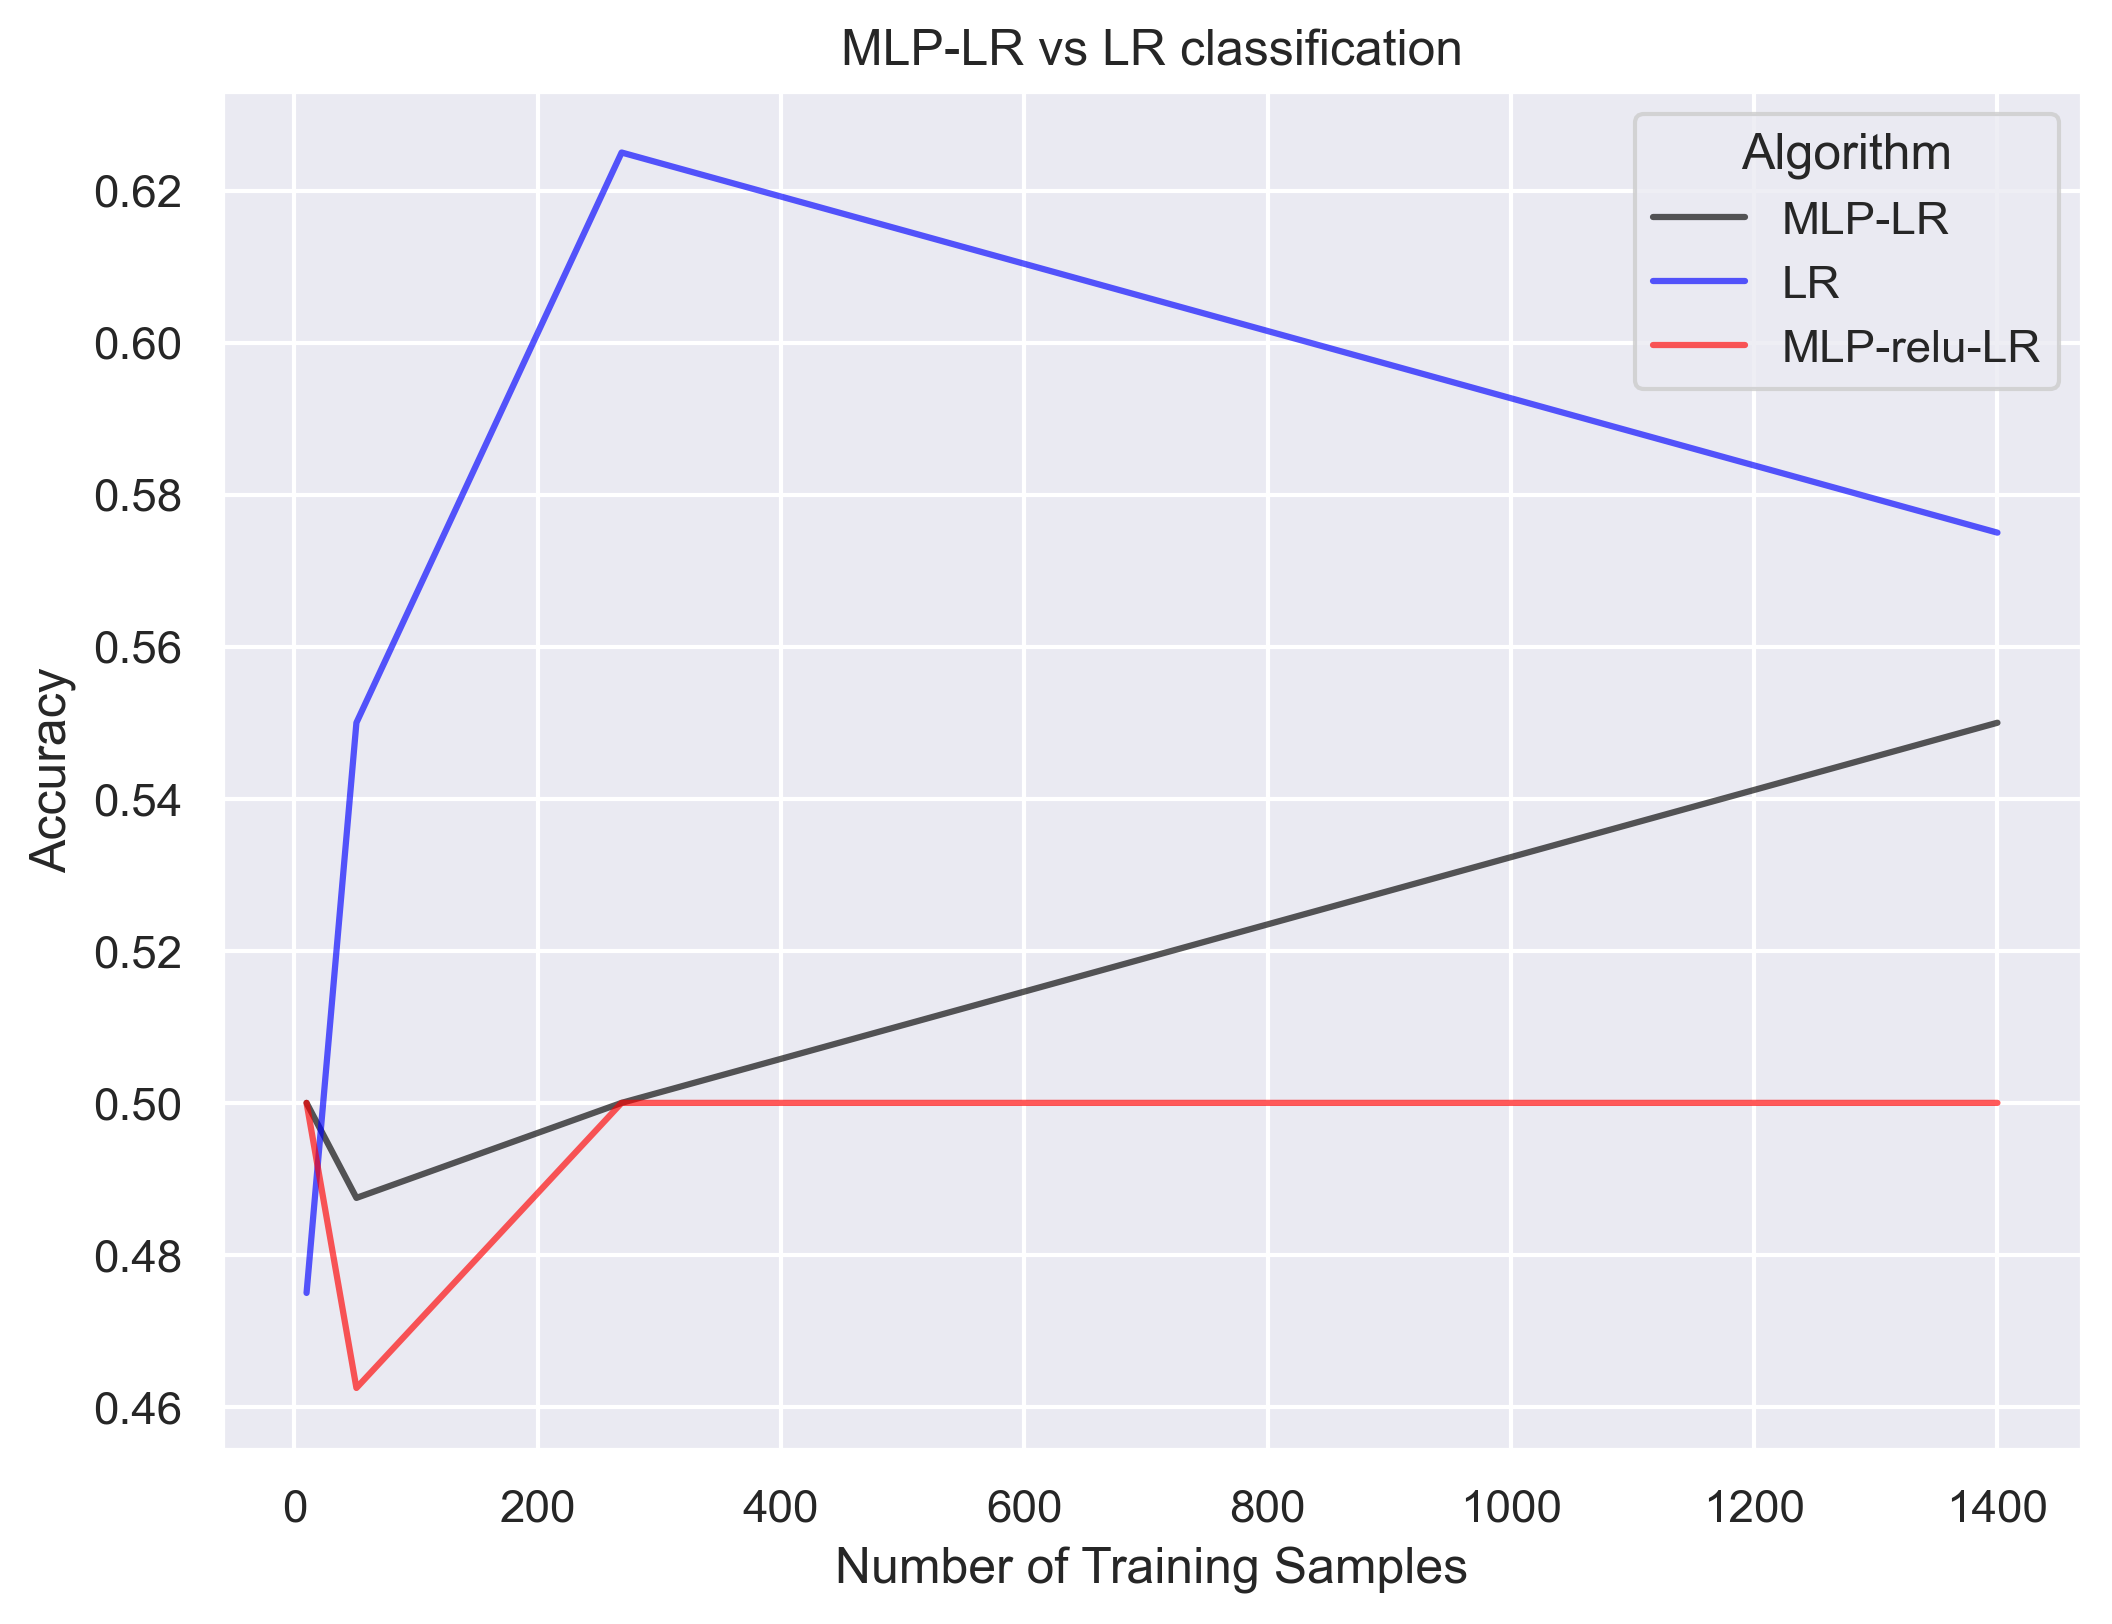

In [12]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
run_classifiers(
        X_sel, y_sel, X_test, y_test, classifiers, names, filename="test.csv")

The data from "test.csv" can be plotted using the plot_data function as follows

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\brainlit\algorithms\regression\log_regression.py:209: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="top left", title="Algorithm")


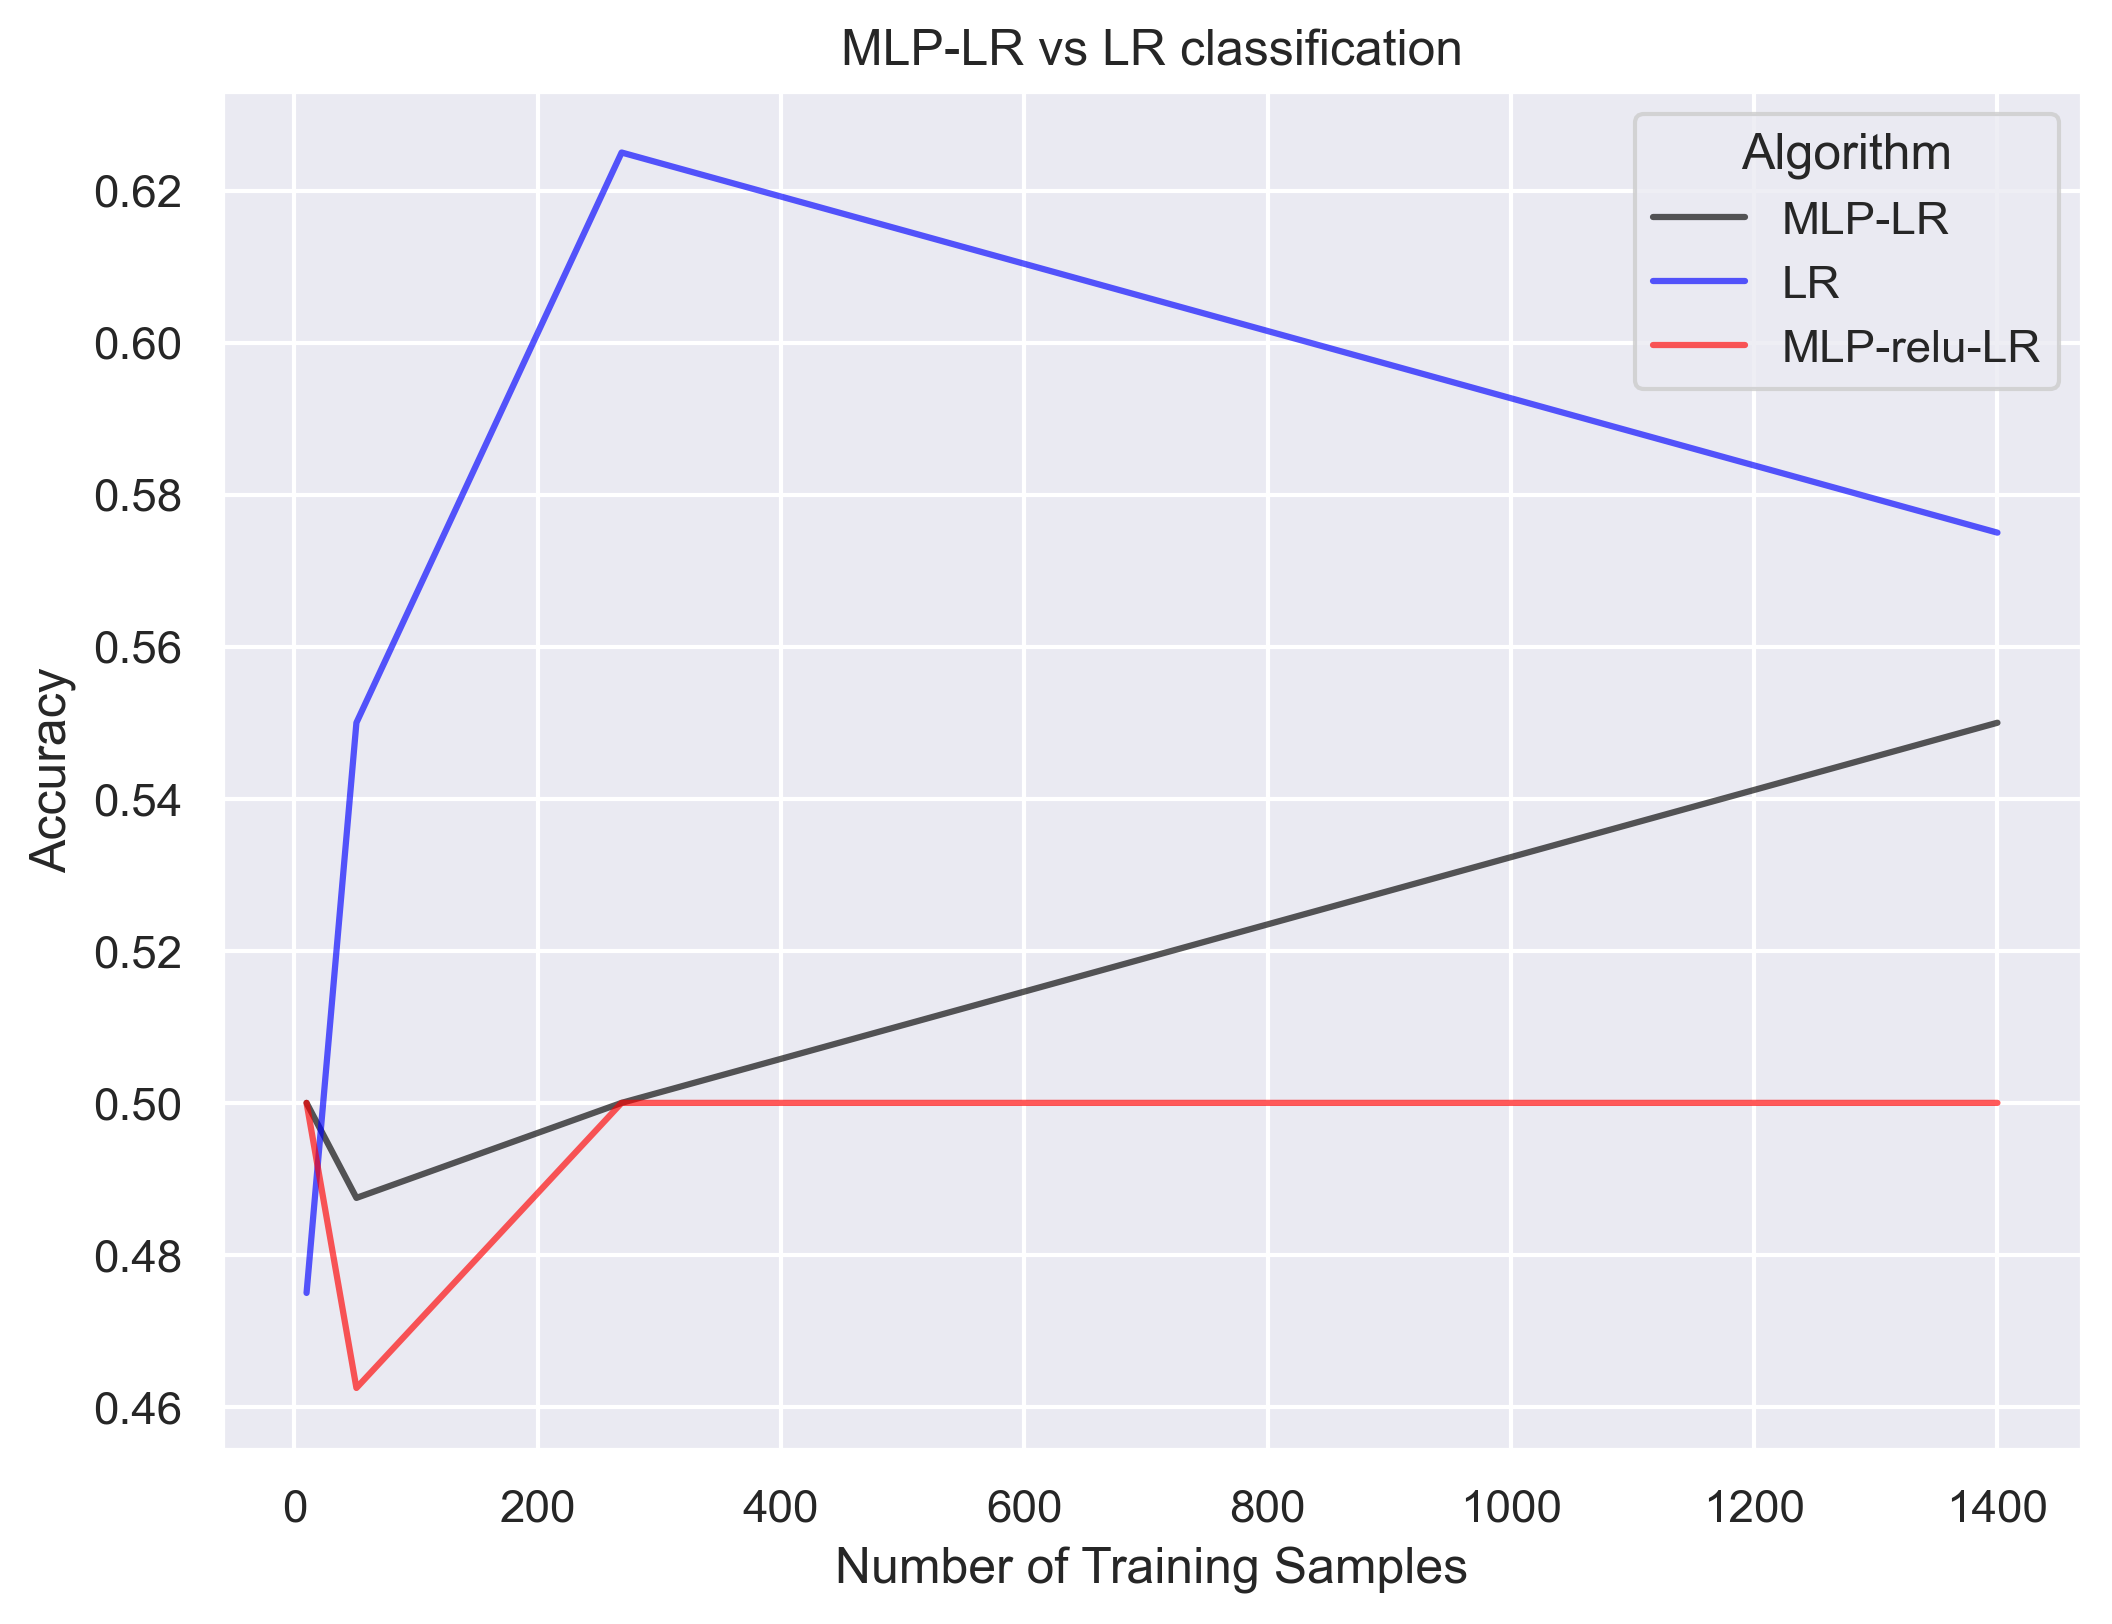

In [14]:
fig,ax = plot_data("test.csv", names, "Accuracy", "Accuracy", "MLP-LR vs LR classification")